#### **Installing dependencies**

In [2]:
!pip install transformers sentencepiece datasets rouge -qq

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 13.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requir

#### **Importing libraries**

In [3]:

import torch
import pandas as pd
from rouge import Rouge
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

#### **Downloading the data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
test = pd.read_csv("/content/drive/MyDrive/test-bengali.csv")

In [6]:
train = pd.read_csv("/content/drive/MyDrive/train-bengali.csv")

In [7]:
test

id  \
0        BengaliNews_test_0   
1        BengaliNews_test_1   
2        BengaliNews_test_2   
3        BengaliNews_test_3   
4        BengaliNews_test_4   
...                     ...   
2946  BengaliNews_test_2995   
2947  BengaliNews_test_2996   
2948  BengaliNews_test_2997   
2949  BengaliNews_test_2998   
2950  BengaliNews_test_2999   

                                                Heading  \
0     ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá ‡¶™‡ßç‡¶∞‡¶•‡¶Æ ‡¶Ü‡¶ß‡¶æ‡¶∞ ‡¶ï‡¶æ‡¶∞‡ßç‡¶° ‡¶™‡ßá‡¶Ø‡¶º‡ßá‡¶õ‡¶ø‡¶≤‡ßá‡¶® ‡¶á‡¶®‡¶ø! ‡¶ï...   
1     Padma Shri News: ‡¶∏‡¶æ‡¶∞‡¶ø‡¶®‡ßç‡¶¶‡¶æ ‡¶¨‡¶æ‡¶ú‡¶ø‡ßü‡ßá ‡ßÆ ‡¶Ø‡ßÅ‡¶ó ‡¶ß‡¶∞‡ßá ‡¶≠‡ßá‡¶≤...   
2     Rail Ticket Reservation System Change|| ‡¶ü‡ßç‡¶∞‡ßá‡¶® ...   
3     PMAY Scheme: ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶¨‡¶æ‡¶∏ ‡¶Ø‡ßã‡¶ú‡¶®‡¶æ‡¶∞ ‡¶∏‡ßÅ‡¶¨‡¶ø‡¶ß‡¶æ ...   
4     ‡¶π‡ßÉ‡¶¶‡¶Ø‡¶º ‡¶≠‡¶æ‡¶≤ ‡¶∞‡¶æ‡¶ñ‡¶¨‡ßá‡¶® ? ‡¶π‡¶æ‡¶∞‡ßç‡¶ü ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶ü‡¶æ‡¶ï, ‡¶∏‡ßç‡¶ü‡ßç‡¶∞‡ßã‡¶ï, ‡¶ï‡¶æ‡¶∞...   
...                                                 ...   
2946  Purulia News I Female Constable Viral Story:¬†‡¶â...   
2947  West Bengal News: ‡¶°‡¶æ‡¶≤ ‡¶ö‡ßã‡¶∞! ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶∞ ‡¶Ö‡¶ô‡ßç‡¶ó‡¶®‡¶ì‡¶Ø‡¶º‡¶æ‡¶∞‡¶ø ...   
2948  ‡¶∏‡ßÅ‡¶ñ‡¶¨‡¶∞! ‡¶è‡¶¨‡¶æ‡¶∞ ‡¶ï‡ßá‡¶¨‡¶≤ ‡¶Æ‡¶ø‡¶∏‡¶° ‡¶ï‡¶≤ ‡¶¶‡¶ø‡¶Ø‡¶º‡ßá ‡¶™‡ßá‡¶Ø‡¶º‡ßá ‡¶Ø‡¶æ‡¶¨‡ßá‡¶® LPG...   
2949  Duare Sarkar: ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡¶Ø‡¶º‡ßá‡¶§ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶ö‡¶®‡ßá‡¶∞ ‡¶Ü‡¶ó‡ßá ‡¶´‡ßá‡¶∞ ‡¶¨‡¶°‡¶º...   
2950   ‡¶™‡ßå‡¶∑ ‡¶Æ‡ßá‡¶≤‡¶æ ‡¶®‡¶æ ‡¶π‡¶≤‡ßá‡¶ì ‡¶¨‡ßã‡¶≤‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶π‡¶≤ ‡¶¨‡¶ø‡¶ï‡¶≤‡ßç‡¶™ ‡¶™‡ßå‡¶∑ ‡¶Æ‡ßá‡¶≤‡¶æ   

                                                Summary  \
0     Ranjana Sonawane the first aadhaar card holder...   
1     Mangala Kanti Roy Padma Shri: ‡¶∏‡¶ô‡ßç‡¶ó‡ßÄ‡¶§ ‡¶§‡¶æ‡¶Å‡¶∞ ‡¶ú‡ßÄ‡¶¨‡¶®...   
2     Eastern railway changed ticket reservation sys...   
3     Easy and simple steps to apply for pradhanmant...   
4     Know Difference Between Heart Attack, Stroke a...   
...                                                 ...   
2946  Purulia News I Female Constable Viral Story:¬†‡¶¨...   
2947  West Bengal News: bangla news, Pulses stolen i...   
2948  Get LPG connection by just giving a missed cal...   
2949  chief secretary hariskrishna dwivedi calls imp...   
2950  ‡¶™‡ßå‡¶∑ ‡¶Æ‡ßá‡¶≤‡¶æ ‡¶®‡¶æ ‡¶π‡¶≤‡ßá‡¶ì ‡¶¨‡ßã‡¶≤‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶π‡¶≤ ‡¶¨‡¶ø‡¶ï‡¶≤‡ßç‡¶™ ‡¶™‡ßå‡¶∑ ‡¶Æ‡ßá...   

                                                Article  
0     ‡¶™‡ßÅ‡¶£‡ßá: ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞ ‡¶Ü‡ßú‡¶æ‡¶á‡¶ü‡ßá‡•§ ‡¶∏‡¶æ‡¶∞‡¶æ ‡¶∏‡¶ï‡¶æ‡¶≤ ‡¶ï‡¶æ‡¶ú ‡¶∏‡ßá‡¶∞‡ßá ‡¶®‡¶ø‡¶ú‡ßá‡¶∞ ‡¶ï...  
1     ‡¶ú‡¶≤‡¶™‡¶æ‡¶á‡¶ó‡ßÅ‡ßú‡¶ø: ‡¶ú‡¶≤‡¶™‡¶æ‡¶á‡¶ó‡ßÅ‡ßú‡¶ø ‡¶ú‡ßá‡¶≤‡¶æ‡ßü ‡¶Æ‡ßü‡¶®‡¶æ‡¶ó‡ßÅ‡ßú‡¶ø ‡¶¨‡ßç‡¶≤‡¶ï‡ßá‡¶∞ ‡¶™‡ßç‡¶∞...  
2     #‡¶Ü‡¶∏‡¶æ‡¶®‡¶∏‡ßã‡¶≤: ‡¶∏‡¶Ç‡¶∞‡¶ï‡ßç‡¶∑‡¶ø‡¶§ ‡¶ï‡¶æ‡¶Æ‡¶∞‡¶æ‡¶Ø‡¶º ‡¶ü‡¶ø‡¶ï‡¶ø‡¶ü‡ßá‡¶∞ ‡¶ï‡ßç‡¶∑‡ßá‡¶§‡ßç‡¶∞‡ßá ‡¶Ü‡¶Æ...  
3     #‡¶®‡¶Ø‡¶º‡¶æ‡¶¶‡¶ø‡¶≤‡ßç‡¶≤‡¶ø: ‡¶Æ‡¶æ‡¶•‡¶æ‡¶∞ ‡¶â‡¶™‡¶∞ ‡¶™‡¶æ‡¶ï‡¶æ ‡¶õ‡¶æ‡¶¶ ‡¶™‡¶æ‡¶¨‡ßá‡¶® ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶∏‡¶Æ...  
4     #‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ¬†: ‡¶π‡¶æ‡¶∞‡ßç‡¶ü ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶ü‡¶æ‡¶ï , ‡¶ï‡¶æ‡¶∞‡ßç‡¶°‡¶ø‡¶Ø‡¶º‡¶æ‡¶ï ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶∞‡ßá‡¶∏‡ßç‡¶ü...  
...                                                 ...  
2946  ‡¶™‡ßÅ‡¶∞‡ßÅ‡¶≤‡¶ø‡¶Ø‡¶º‡¶æ: ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø ‡¶ú‡ßÅ‡¶°‡¶º‡ßá ‡¶ö‡¶≤‡¶õ‡ßá ‡¶â‡¶ö‡ßç‡¶ö‡¶Æ‡¶æ‡¶ß‡ßç‡¶Ø‡¶Æ‡¶ø‡¶ï ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç...  
2947  #‡¶∂‡¶æ‡¶®‡ßç‡¶§‡¶ø‡¶™‡ßÅ‡¶∞: ‡¶ö‡ßã‡¶∞‡ßá‡¶¶‡ßá‡¶∞ ‡¶π‡¶Ø‡¶º‡¶§‡ßã ‡¶≠‡ßÄ‡¶∑‡¶£ ‡¶™‡¶õ‡¶®‡ßç‡¶¶ ‡¶°‡¶æ‡¶≤! ‡¶§‡¶æ‡¶á ...  
2948  #‡¶®‡¶Ø‡¶º‡¶æ‡¶¶‡¶ø‡¶≤‡ßç‡¶≤‡¶ø: ‡¶∞‡¶æ‡¶®‡ßç‡¶®‡¶æ‡¶∞ ‡¶ó‡ßç‡¶Ø‡¶æ‡¶∏‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶ï‡¶æ‡¶®‡ßá‡¶ï‡¶∂‡¶® ‡¶®‡ßá‡¶ì‡¶Ø...  
2949  ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ : ‡¶¶‡ßÅ‡¶Ø‡¶º‡¶æ‡¶∞‡ßá ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞ ‡¶®‡¶ø‡¶Ø‡¶º‡ßá ‡¶Ü‡¶ú, ‡¶∂‡¶®‡¶ø‡¶¨‡¶æ‡¶∞ ‡¶¨‡¶ø‡¶ï‡ßá‡¶≤ ...  
2950  #‡¶¨‡ßÄ‡¶∞‡¶≠‡ßÇ‡¶Æ: ‡ß®‡ß¶‡ßß‡ßØ ‡¶∏‡¶æ‡¶≤‡ßá ‡¶∂‡ßá‡¶∑‡¶¨‡¶æ‡¶∞ ‡¶∂‡¶æ‡¶®‡ßç‡¶§‡¶ø‡¶®‡¶ø‡¶ï‡ßá‡¶§‡¶®‡ßá‡¶∞ ‡¶™‡ßÇ‡¶∞‡ßç‡¶¨...  

[2951 rows x 4 columns]

In [8]:
train

id  \
0          bengali_2023_train_0   
1          bengali_2023_train_1   
2          bengali_2023_train_2   
3          bengali_2023_train_3   
4          bengali_2023_train_4   
...                         ...   
12351  bengali_2023_train_12351   
12352  bengali_2023_train_12352   
12353  bengali_2023_train_12353   
12354  bengali_2023_train_12354   
12355  bengali_2023_train_12355   

                                                 Heading  \
0      Chandrayaan-3: ‡¶Ü‡¶ú ‡¶ï‡¶ñ‡¶®, ‡¶ï‡ßã‡¶•‡¶æ ‡¶•‡ßá‡¶ï‡ßá ‡¶â‡ßé‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£, ‡¶≠‡¶æ‡¶∞...   
1      Suvendu Adhikari: '‡¶Ü‡¶™‡¶®‡¶ø ‡¶¨‡¶ø‡¶ú‡ßá‡¶™‡¶ø‡¶∞ ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø ‡¶∏‡¶≠‡¶æ‡¶™‡¶§‡¶ø ‡¶π...   
2      Bus Accident: ‡¶∏‡¶≤‡ßç‡¶ü‡¶≤‡ßá‡¶ï ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂ ‡¶≠‡¶¨‡¶®‡ßá‡¶∞ ‡¶∏‡¶æ‡¶Æ‡¶®‡ßá ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ...   
3      Saumitra Khan: ‡¶Ö‡¶≠‡¶ø‡¶∑‡ßá‡¶ï‡ßá‡¶∞ ‡¶∏‡¶ô‡ßç‡¶ó‡ßá ‡¶Æ‡¶ø‡¶ü‡¶ø‡¶Ç? ‡¶§‡ßÉ‡¶£‡¶Æ‡ßÇ‡¶≤‡ßá‡¶á ...   
4      Sujata Mondal: ‡¶∏‡ßå‡¶Æ‡¶ø‡¶§‡ßç‡¶∞ ‡¶§‡ßÉ‡¶£‡¶Æ‡ßÇ‡¶≤‡ßá ‡¶´‡¶ø‡¶∞‡¶¨‡ßá‡¶®? ‡¶è‡¶∞‡¶á ‡¶Æ‡¶ß‡ßç...   
...                                                  ...   
12351  Pawandeep Rajan-Arunita Kanjilal: ‡¶Ü‡¶∞ ‡¶∞‡¶æ‡¶ñ‡¶¢‡¶æ‡¶ï ‡¶®‡ßü...   
12352  Pawandeep Rajan-Arunita Kanjilal: ‡¶á‡¶®‡ßç‡¶°‡¶ø‡ßü‡¶æ‡¶® ‡¶Ü‡¶á‡¶°...   
12353  Shibani Dandekar Javed Akhtar Dance: ‡¶®‡¶¨‡¶¨‡¶ß‡ßÇ ‡¶∂‡¶ø‡¶¨...   
12354  Ashes Series: Aus vs Eng: ‡¶ï‡ßã‡¶®‡¶ì‡¶ï‡ßç‡¶∞‡¶Æ‡ßá ‡¶π‡¶æ‡¶∞ ‡¶¨‡¶æ‡¶Å‡¶ö‡¶ø‡¶Ø...   
12355  Hooghly News: ‡¶Ö‡¶∏‡¶Æ‡¶Ø‡¶º‡ßá‡¶∞ ‡¶ù‡¶°‡¶º-‡¶¨‡ßÉ‡¶∑‡ßç‡¶ü‡¶ø‡¶§‡ßá ‡¶¨‡ßç‡¶Ø‡¶æ‡¶™‡¶ï ‡¶ï‡ßç‡¶∑‡¶§...   

                                                 Summary  \
0      Chandrayaan-3: ‡¶Ü‡¶ú ‡¶ï‡¶ñ‡¶®, ‡¶ï‡ßã‡¶•‡¶æ ‡¶•‡ßá‡¶ï‡ßá ‡¶â‡ßé‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£, ‡¶≠‡¶æ‡¶∞...   
1      Suvendu Adhikari: ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡ßü‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï...   
2      Bus Accident: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡ßü ‡¶¨‡¶æ...   
3      ‡¶∏‡ßå‡¶Æ‡¶ø‡¶§‡ßç‡¶∞ ‡¶ñ‡¶æ‡¶Å ‡¶¨‡¶≤‡ßá‡¶®, ‡ß®‡ß¶‡ßß‡ßØ ‡¶∏‡¶æ‡¶≤‡ßá ‡¶¨‡¶ø‡¶ú‡ßá‡¶™‡¶ø‡¶§‡ßá ‡¶Ø‡ßã‡¶ó‡¶¶‡¶æ‡¶®‡ßá‡¶∞ ...   
4      ‡¶¶‡¶≤‡ßÄ‡ßü ‡¶®‡ßá‡¶§‡¶æ ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶Æ‡¶ø‡¶∑‡ßç‡¶ü‡¶ø ‡¶Æ‡ßÅ‡¶ñ ‡¶ï‡¶∞‡¶ø‡ßü‡ßá ‡¶â‡ßé‡¶∏‡¶æ‡¶π ‡¶¶‡¶ø‡¶§‡ßá...   
...                                                  ...   
12351  Indian Idol 12 Winner Pawandeep Rajan Confirms...   
12352  Indian Idol 12 Grand Finale Pawandeep Rajan an...   
12353  Shibani Dandekar Javed Akhtar Dance, ‡¶∂‡¶ø‡¶¨‡¶æ‡¶®‡¶ø ‡¶°‡¶æ...   
12354  Ashes Series: Aus vs Eng: ‡¶ï‡ßã‡¶®‡¶ì‡¶ï‡ßç‡¶∞‡¶Æ‡ßá ‡¶π‡¶æ‡¶∞ ‡¶¨‡¶æ‡¶Å‡¶ö‡¶ø‡¶Ø...   
12355  ‡¶π‡ßÅ‡¶ó‡¶≤‡¶ø‡¶∞ ‡¶®‡¶æ‡¶®‡¶æ‡¶® ‡¶™‡ßç‡¶∞‡¶æ‡¶®‡ßç‡¶§‡ßá ‡¶¨‡¶ø‡¶ï‡ßá‡¶≤‡ßá‡¶∞ ‡¶¶‡¶ø‡¶ï‡ßá ‡¶®‡¶ø‡¶Ø‡¶º‡¶Æ ‡¶ï‡¶∞‡ßá ‡¶ù...   

                                                 Article  
0      ‡¶∂‡ßç‡¶∞‡ßÄ‡¶π‡¶∞‡¶ø‡¶ï‡ßã‡¶ü‡¶æ:¬† ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶®‡ßá ‡¶Ü‡¶ú ‡¶è‡¶ï ‡¶¶‡¶æ‡¶∞...  
1      ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡ßü‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡ßá...  
2      ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡ßü ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ‡¶∞‡ßç...  
3      ‡¶™‡ßç‡¶∞‡¶ø‡¶Ø‡¶º‡¶¨‡ßç‡¶∞‡¶§ ‡¶ó‡ßã‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ, ‡¶¨‡¶æ‡¶Å‡¶ï‡ßÅ‡¶°‡¶º‡¶æ: ‡¶§‡ßÉ‡¶£‡¶Æ‡ßÇ‡¶≤‡ßá ‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ‡¶∞ ...  
4      ‡¶¨‡¶æ‡¶Å‡¶ï‡ßÅ‡¶°‡¶º‡¶æ: ‡¶¨‡ßú ‡¶Ö‡¶ô‡ßç‡¶ï‡ßá‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶ß‡¶æ‡¶®‡ßá ‡¶¨‡¶æ‡¶Å‡¶ï‡ßÅ‡ßú‡¶æ‡¶∞ ‡¶ú‡ßü‡¶™‡ßÅ‡¶∞ ‡¶¨‡ßç...  
...                                                  ...  
12351  #‡¶Æ‡ßÅ‡¶Æ‡ßç‡¶¨‡¶á: ‡¶á‡¶®‡ßç‡¶°‡¶ø‡ßü‡¶æ‡¶® ‡¶Ü‡¶á‡¶°‡¶≤ ‡ßß‡ß® ‡¶ö‡¶≤‡¶æ‡¶ï‡¶æ‡¶≤‡ßÄ‡¶®‡¶á ‡¶§‡¶æ‡¶Å‡¶¶‡ßá‡¶∞ ‡¶∏‡¶Æ‡ßç...  
12352  #‡¶Æ‡ßÅ‡¶Æ‡ßç‡¶¨‡¶á: ‡¶Ü‡¶ü ‡¶Æ‡¶æ‡¶∏‡ßá‡¶∞ ‡¶ü‡¶æ‡¶®‡¶æ '‡¶ó‡¶æ‡¶®‡ßá‡¶∞ ‡¶≤‡¶°‡¶º‡¶æ‡¶á'-‡¶è‡¶∞ ‡¶™‡¶∞ ‡¶∞‡¶¨‡¶ø...  
12353  #‡¶Æ‡ßÅ‡¶Æ‡ßç‡¶¨‡¶á: ‡¶ó‡¶§ ‡ßß‡ßØ ‡¶´‡ßá‡¶¨‡ßç‡¶∞‡ßÅ‡ßü‡¶æ‡¶∞‡¶ø ‡¶ñ‡¶æ‡¶®‡ßç‡¶°‡¶æ‡¶≤‡¶æ‡ßü ‡¶ú‡¶æ‡¶Å‡¶ï‡¶ú‡¶Æ‡¶ï ‡¶≠‡¶æ...  
12354  #‡¶∏‡¶ø‡¶°‡¶®‡¶ø: ‡¶Ö‡¶∏‡ßç‡¶ü‡ßç‡¶∞‡ßá‡¶≤‡¶ø‡¶Ø‡¶º‡¶æ ‡¶¨‡¶®‡¶æ‡¶Æ ‡¶á‡¶Ç‡¶≤‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡ßá‡¶∞¬†¬†(Austra...  
12

In [9]:
text = train['Article']
goldsummary = train['Summary']

**Note**: Mostly data is cleaned except few numerical values such as days and count, and maybe it is best not to remove them becuase summary also contains these numbers and it can be valuable for text generation.

### **Model1 : BART**

In [10]:
bart_checkpoint = "ai4bharat/IndicBART"

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
tokenizer_bart = AutoTokenizer.from_pretrained(bart_checkpoint,
                                               do_lower_case=False,
                                               use_fast=False,
                                               keep_accents=True)

model_bart = AutoModelForSeq2SeqLM.from_pretrained(bart_checkpoint).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/832 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/221 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/976M [00:00<?, ?B/s]

In [13]:
bos_id = tokenizer_bart._convert_token_to_id_with_added_voc("<s>")
eos_id = tokenizer_bart._convert_token_to_id_with_added_voc("</s>")
pad_id = tokenizer_bart._convert_token_to_id_with_added_voc("<pad>")

In [15]:
import time
import torch

# Track the start time
start_time = time.time()
test
# Define half the dataset length
half_length = len(text) // 20  # Process only a little of the dataset

# Summary storage
SystemSummary = []
print("Starting now")

for i, input_text in enumerate(text[:half_length]):  # Only iterate over half of the dataset
    if i % 10 == 0:
        print(f"Processing input {i+1}/{half_length}")

    # Step 1: Tokenize the input text
    if i % 10 == 0:
        print(f"Tokenizing input text: {input_text[:50]}...")  # Show first 50 chars of input for brevity
    inp = tokenizer_bart(
        input_text,
        add_special_tokens=False,
        truncation=True,
        return_tensors="pt",
        padding='max_length',
        max_length=1024
    )['input_ids'].to(device)
    if i % 10 == 0:
        print(f"Tokenized input shape: {inp.shape}")

    # Step 2: Generate the summary
    if i % 10 == 0:
        print("Generating summary using model...")
    model_output = model_bart.generate(
        inp,
        use_cache=True,
        num_beams=4,
        max_length=70,
        min_length=30,
        early_stopping=True,
        pad_token_id=pad_id,
        bos_token_id=bos_id,
        eos_token_id=eos_id,
        decoder_start_token_id=tokenizer_bart._convert_token_to_id_with_added_voc("<2en>")
    )
    if i % 10 == 0:
        print(f"Generated token IDs: {model_output[0].tolist()}")

    # Step 3: Decode the generated output
    decoded_output = tokenizer_bart.decode(
        model_output[0],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False
    )
    if i % 10 == 0:
        print(f"Decoded summary: {decoded_output[:50]}...")  # Show first 50 chars of summary

    # Step 4: Append to the summary list
    SystemSummary.append(decoded_output)
    if i % 10 == 0:
        print(f"Summary {i+1} appended to SystemSummary")

# Total time taken
end_time = time.time()
print(f"Total processing time for half dataset: {end_time - start_time:.2f} seconds")


Starting now
Processing input 1/617
Tokenizing input text: ‡¶∂‡ßç‡¶∞‡ßÄ‡¶π‡¶∞‡¶ø‡¶ï‡ßã‡¶ü‡¶æ:¬† ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶®‡ßá ‡¶Ü‡¶ú ‡¶è‡¶ï ‡¶¶‡¶æ‡¶∞‡ßÅ‡¶£ ‡¶ó...
Tokenized input shape: torch.Size([1, 1024])
Generating summary using model...
Generated token IDs: [64004, 41, 60859, 59648, 59569, 60151, 60208, 59569, 59593, 59738, 59648, 59648, 59656, 59478, 53, 41, 60859, 59478, 59569, 59679, 59609, 59569, 41, 60028, 60208, 59478, 59738, 59478, 60859, 41, 59656, 59593, 60038, 59648, 1, 59478, 59647, 59609, 41, 60817, 60859, 59609, 59569, 41, 59648, 59478, 59569, 60051, 60817, 41, 60364, 59569, 59648, 59656, 59609, 59569, 41, 59656, 59593, 59647, 50, 41, 60817, 60038, 60038, 41, 60208, 59656, 59609, 2]
Decoded summary: ‡¶∂‡ßç‡¶∞‡ßÄ‡¶π‡¶∞‡¶ø‡¶ï‡ßç‡ßç‡¶¨‡¶æ: ‡¶∂‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶Ç‡ßç‡¶æ‡¶®‡ßá Áïô‡¶∂‡ßá‡¶∞ ‡ßç‡¶æ‡¶∞‡ßÅÁïô ‡¶ó‡¶∞‡ßç...
Summary 1 appended to SystemSummary
Processing input 11/617
Tokenizing input text: ‡¶Ö‡¶®‡ßç‡¶ß‡ßç‡¶

In [16]:
Summaries = pd.DataFrame(list(zip(goldsummary, SystemSummary)), columns =['GoldSummary', 'BartSummary'])
Summaries

GoldSummary  \
0    Chandrayaan-3: ‡¶Ü‡¶ú ‡¶ï‡¶ñ‡¶®, ‡¶ï‡ßã‡¶•‡¶æ ‡¶•‡ßá‡¶ï‡ßá ‡¶â‡ßé‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£, ‡¶≠‡¶æ‡¶∞...   
1    Suvendu Adhikari: ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡ßü‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï...   
2    Bus Accident: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡ßü ‡¶¨‡¶æ...   
3    ‡¶∏‡ßå‡¶Æ‡¶ø‡¶§‡ßç‡¶∞ ‡¶ñ‡¶æ‡¶Å ‡¶¨‡¶≤‡ßá‡¶®, ‡ß®‡ß¶‡ßß‡ßØ ‡¶∏‡¶æ‡¶≤‡ßá ‡¶¨‡¶ø‡¶ú‡ßá‡¶™‡¶ø‡¶§‡ßá ‡¶Ø‡ßã‡¶ó‡¶¶‡¶æ‡¶®‡ßá‡¶∞ ...   
4    ‡¶¶‡¶≤‡ßÄ‡ßü ‡¶®‡ßá‡¶§‡¶æ ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶Æ‡¶ø‡¶∑‡ßç‡¶ü‡¶ø ‡¶Æ‡ßÅ‡¶ñ ‡¶ï‡¶∞‡¶ø‡ßü‡ßá ‡¶â‡ßé‡¶∏‡¶æ‡¶π ‡¶¶‡¶ø‡¶§‡ßá...   
..                                                 ...   
612  Asansol News: ‡¶§‡¶ø‡¶®‡¶ú‡¶®‡ßá ‡¶è‡¶ï‡¶ü‡¶ø ‡¶¨‡¶æ‡¶á‡¶ï‡ßá ‡¶ú‡ßÅ‡¶¨‡¶ø‡¶≤‡ßÄ ‡¶Æ‡ßã‡¶°‡¶º ‡¶è‡¶∞...   
613  ‡¶¨‡¶π‡¶ø‡¶∞‡¶æ‡¶ó‡¶§‡¶¶‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶Ö‡¶§‡ßç‡¶Ø‡¶æ‡¶ö‡¶æ‡¶∞‡¶ø‡¶§ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡¶® ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá‡¶∞ ‡¶Æ‡¶π‡¶ø‡¶≤...   
614  West Bardhaman News: ‡¶∏‡¶Ç‡¶ï‡¶≤‡ßç‡¶™ ‡¶™‡ßÇ‡¶∞‡¶£ ‡¶π‡¶≤ ‡¶®‡¶æ‡•§ ‡¶´‡ßá‡¶∞‡¶æ ‡¶π...   
615  bangla news west bengal news Nawsad Siddique s...   
616  ‡¶Ü‡¶§‡ßç‡¶∞‡ßá‡¶Ø‡¶º‡ßÄ ‡¶¨‡¶Ø‡¶º‡¶∏ ‡¶Æ‡¶æ‡¶§‡ßç‡¶∞ ‡ß´ ‡¶¨‡¶õ‡¶∞ ‡ßß ‡¶Æ‡¶æ‡¶∏‡•§ ‡¶Ü‡¶∞ ‡¶è‡¶á ‡¶¨‡ßü‡¶∏‡ßá‡¶á ‡¶Ü...   

                                           BartSummary  
0    ‡¶∂‡ßç‡¶∞‡ßÄ‡¶π‡¶∞‡¶ø‡¶ï‡ßç‡ßç‡¶¨‡¶æ: ‡¶∂‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶Ç‡ßç‡¶æ‡¶®‡ßá Áïô‡¶∂‡ßá‡¶∞ ‡ßç‡¶æ‡¶∞‡ßÅÁïô...  
1    ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶®‡¶®‡ßç‡ßç‡ßç‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡ßç‡ßç‡¶æ‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡¶¨‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡ßá...  
2    ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡¶Ø‡¶º ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ‡¶∞...  
3    ‡¶™‡ßç‡¶∞‡¶ø‡¶Ø‡¶º‡¶¨‡ßç‡¶∞‡¶§ ‡¶¨‡¶Ç‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ, ‡¶¨‡¶æ‡¶Ç‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ: ‡¶§ÈÅîÈÅî‡¶ÆÈÅî‡¶≤‡ßá ‡¶Ø‡¶æ‡¶Ç‡¶Ø‡¶º‡¶æ‡¶∞...  
4    ‡¶¨‡¶æ‡¶Ç‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ: ‡¶¨‡ßç‡ßç‡ßç‡ßç‡ßç‡¶ï‡ßá‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶Ç‡¶æ‡¶®‡ßá ‡¶¨‡¶æÈÅî‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶Ç‡¶∞ ...  
..                                                 ...  
612  ‡¶æ‡¶∏‡¶æ‡¶®‡¶∏‡¶Ç‡¶≤, ‡¶™‡¶∂‡ßç‡¶Ç‡¶ø‡¶Æ ‡¶¨‡¶∞‡ßç‡¶Ç‡¶Æ‡¶æ‡¶® : ‡¶∂‡¶æ‡¶§‡ßÄ‡¶Ø‡¶º ‡¶∏‡¶Ç‡¶º‡¶ï‡ßá ‡¶Æ‡¶∞‡ßç‡¶Æ‡¶æ‡¶®‡ßç...  
613  ‡ßç‡¶∏‡¶æ‡¶®‡¶∏‡¶Ç‡¶≤ : ‡ßç‡¶≤‡¶æ‡¶ï‡¶æ‡¶Ø‡¶º ‡¶¨‡¶æ‡ßç‡¶æ‡¶§ ‡¶¨‡¶æ‡¶∂‡¶º‡ßá ‡¶¨‡¶π‡¶ø‡¶∞‡¶æ‡¶ó‡¶§‡¶¶‡ßá‡¶∞‡•§ ‡¶¨‡ßÅ‡¶∞‡¶ø...  
614  ‡¶¨‡¶∏‡¶æ‡¶®‡¶∏‡¶Ç‡¶≤, ‡¶™‡¶∂‡ßç‡¶Ç‡¶ø‡¶Æ ‡¶¨‡¶∞‡ßç‡¶Ç‡¶Æ‡¶æ‡¶®: ‡¶∏‡¶ï‡¶æ‡¶≤ ‡¶∏‡¶ï‡¶æ‡¶≤ ‡¶¨‡ßá‡¶∞‡¶ø‡¶Ø‡¶º‡ßá‡¶Ç‡¶ø‡¶≤‡ßá...  
615  ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶™‡ßç‡ßç‡¶æ‡¶Ø‡¶º‡ßá‡¶§ ‡¶∂‡ßç‡ßç‡ßç‡¶æ‡¶∞ ‡¶™‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡¶§‡¶™‡ßç‡ßç‡ßç‡ßç‡¶æ‡¶∞ ‡¶∞...  
616  #‡¶™‡¶∂‡ßç‡¶¨‡¶ø‡¶Æ ‡¶Æ‡ßá‡¶¶‡¶ø‡¶®‡ßÄ‡¶™‡ßÅ‡¶∞: ‡¶™‡¶∂‡ßç‡¶Ç‡¶ø‡¶Æ ‡¶Æ‡ßá‡¶¶‡¶ø‡¶®‡ßÄ‡¶™‡ßÅ‡¶∞‡ßá‡¶∞ ‡¶¨‡¶Ç‡¶Ø‡¶º‡¶æ‡¶≤‡¶§‡ßç...  

[617 rows x 2 columns]

In [17]:
rouge = Rouge()
score = rouge.get_scores(Summaries['BartSummary'], Summaries['GoldSummary'], avg=True)
BartRouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
BartRouge

rouge-1   rouge-2   rouge-l
recall     0.019620  0.003979  0.019339
precision  0.059766  0.013124  0.058904
f-measure  0.028822  0.005937  0.028403

### **Model2 : T5**

In [18]:
t5_checkpoint = "csebuetnlp/mT5_multilingual_XLSum"

tokenizer_t5 = AutoTokenizer.from_pretrained(t5_checkpoint)
model_t5 = AutoModelForSeq2SeqLM.from_pretrained(t5_checkpoint).to(device)

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning:

The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.



pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

In [19]:
%%time

SystemSummary1 = []

print("Starting summarization process...")  # Starting message

for i, input_text in enumerate(text):
  if i == 617:
    break
  else:
    # Print the current text being processed
    print(f"\nProcessing text {i + 1} out of {len(text)}:")

    # Step 1: Tokenizing input text
    print("  Tokenizing input text...")
    input_ids = tokenizer_t5(
        input_text,
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=768
    )["input_ids"].to(device)
    print("  Tokenization complete.")

    # Step 2: Generate summary every 10 iterations
    if i % 10 == 0:
        print(f"Generating summary for text {i + 1} using model...")

    # Step 3: Generating model output
    model_output = model_t5.generate(
        input_ids=input_ids,
        num_beams=4,
        max_length=70,
        min_length=30,
        no_repeat_ngram_size=2,
        early_stopping=True
    )
    print("  Summary generated successfully.")

    # Step 4: Decoding model output to text
    print("  Decoding generated summary...")
    decoded_output = tokenizer_t5.decode(
        model_output[0],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False
    )
    print("  Decoding complete.")

    # Step 5: Append decoded summary to results
    print("  Appending summary to the list.")
    SystemSummary1.append(decoded_output)

print("\nSummarization process complete.")
SystemSummary1


Starting summarization process...

Processing text 1 out of 12356:
  Tokenizing input text...
  Tokenization complete.
Generating summary for text 1 using model...
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 2 out of 12356:
  Tokenizing input text...
  Tokenization complete.


model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 3 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 4 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 5 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 6 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 7 out of 12356:
  Tokenizing input text...


['‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶®‡ßá ‡¶Ü‡¶ú ‡¶è‡¶ï ‡¶¶‡¶æ‡¶∞‡ßÅ‡¶£ ‡¶ó‡¶∞‡ßç‡¶¨‡ßá‡¶∞ ‡¶¶‡¶ø‡¶®! ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶æ‡¶Ø‡¶º‡¶® ‡ß© -‡¶∞ ‡¶â‡ßé‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£',
 '‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ‡¶∞ ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡¶Ø‡¶º‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡ßá ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø‡ßá‡¶∞ ‡¶°‡ßá‡¶ô‡ßç‡¶ó‡¶ø ‡¶™‡¶∞‡¶ø‡¶∏‡ßç‡¶•‡¶ø‡¶§‡¶ø, ‡¶è‡¶ï‡¶æ‡¶ß‡¶ø‡¶ï ‡¶¨‡¶ø‡¶∑‡¶Ø‡¶º‡ßá ‡¶Ü‡¶¨‡¶æ‡¶∞ ‡¶Æ‡ßÅ‡¶ñ ‡¶ñ‡ßÅ‡¶≤‡¶≤‡ßá‡¶® ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶¶‡¶≤‡¶®‡ßá‡¶§‡¶æ ‡¶∂‡ßÅ‡¶≠‡ßá‡¶®‡ßç‡¶¶‡ßÅ ‡¶Ö‡¶ß‡¶ø‡¶ï‡¶æ‡¶∞‡ßÄ‡•§',
 '‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡¶Ø‡¶º ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ‡¶∞‡ßç‡¶ò‡¶ü‡¶®‡¶æ‡•§ ‡¶∏‡¶≤‡ßç‡¶ü‡¶≤‡ßá‡¶ï ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂ ‡¶≠‡¶¨‡¶®‡ßá‡¶∞ ‡¶∏‡¶æ‡¶Æ‡¶®‡ßá ‡¶®‡¶ø‡¶Ø‡¶º‡¶®‡ßç‡¶§‡ßç‡¶∞‡¶£ ‡¶π‡¶æ‡¶∞‡¶æ‡¶≤ ‡¶¨‡¶æ‡¶∏‡•§',
 '‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶≤‡ßã‡¶ï‡¶∏‡¶≠‡¶æ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶ö‡¶®‡ßá ‡¶¨‡¶ø‡¶ú‡ßá‡¶™‡¶ø‡¶∞ ‡¶ú‡¶Ø‡¶º ‡¶®‡¶ø‡¶Ø‡¶º‡ßá ‡¶§‡ßÄ‡¶¨‡ßç‡¶∞ ‡¶ï‡¶ü‡¶æ‡¶

In [20]:
Summaries['T5Summary'] = SystemSummary1

In [21]:
Summaries['T5Summary'] = (SystemSummary1 * (len(Summaries) // len(SystemSummary1) + 1))[:len(Summaries)]


In [22]:
Summaries.head()

GoldSummary  \
0  Chandrayaan-3: ‡¶Ü‡¶ú ‡¶ï‡¶ñ‡¶®, ‡¶ï‡ßã‡¶•‡¶æ ‡¶•‡ßá‡¶ï‡ßá ‡¶â‡ßé‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£, ‡¶≠‡¶æ‡¶∞...   
1  Suvendu Adhikari: ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡ßü‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï...   
2  Bus Accident: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡ßü ‡¶¨‡¶æ...   
3  ‡¶∏‡ßå‡¶Æ‡¶ø‡¶§‡ßç‡¶∞ ‡¶ñ‡¶æ‡¶Å ‡¶¨‡¶≤‡ßá‡¶®, ‡ß®‡ß¶‡ßß‡ßØ ‡¶∏‡¶æ‡¶≤‡ßá ‡¶¨‡¶ø‡¶ú‡ßá‡¶™‡¶ø‡¶§‡ßá ‡¶Ø‡ßã‡¶ó‡¶¶‡¶æ‡¶®‡ßá‡¶∞ ...   
4  ‡¶¶‡¶≤‡ßÄ‡ßü ‡¶®‡ßá‡¶§‡¶æ ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶Æ‡¶ø‡¶∑‡ßç‡¶ü‡¶ø ‡¶Æ‡ßÅ‡¶ñ ‡¶ï‡¶∞‡¶ø‡ßü‡ßá ‡¶â‡ßé‡¶∏‡¶æ‡¶π ‡¶¶‡¶ø‡¶§‡ßá...   

                                         BartSummary  \
0  ‡¶∂‡ßç‡¶∞‡ßÄ‡¶π‡¶∞‡¶ø‡¶ï‡ßç‡ßç‡¶¨‡¶æ: ‡¶∂‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶Ç‡ßç‡¶æ‡¶®‡ßá Áïô‡¶∂‡ßá‡¶∞ ‡ßç‡¶æ‡¶∞‡ßÅÁïô...   
1  ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶®‡¶®‡ßç‡ßç‡ßç‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡ßç‡ßç‡¶æ‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡¶¨‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡ßá...   
2  ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡¶Ø‡¶º ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ‡¶∞...   
3  ‡¶™‡ßç‡¶∞‡¶ø‡¶Ø‡¶º‡¶¨‡ßç‡¶∞‡¶§ ‡¶¨‡¶Ç‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ, ‡¶¨‡¶æ‡¶Ç‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ: ‡¶§ÈÅîÈÅî‡¶ÆÈÅî‡¶≤‡ßá ‡¶Ø‡¶æ‡¶Ç‡¶Ø‡¶º‡¶æ‡¶∞...   
4  ‡¶¨‡¶æ‡¶Ç‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ: ‡¶¨‡ßç‡ßç‡ßç‡ßç‡ßç‡¶ï‡ßá‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶Ç‡¶æ‡¶®‡ßá ‡¶¨‡¶æÈÅî‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶Ç‡¶∞ ...   

                                           T5Summary  
0  ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶®‡ßá ‡¶Ü‡¶ú ‡¶è‡¶ï ‡¶¶‡¶æ‡¶∞‡ßÅ‡¶£ ‡¶ó‡¶∞‡ßç‡¶¨‡ßá‡¶∞ ‡¶¶‡¶ø‡¶®!...  
1  ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ‡¶∞ ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡¶Ø‡¶º‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞...  
2  ‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡¶Ø‡¶º ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ‡¶∞...  
3  ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶≤‡ßã‡¶ï‡¶∏‡¶≠‡¶æ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶ö‡¶®‡ßá ‡¶¨‡¶ø‡¶ú‡ßá‡¶™‡¶ø‡¶∞ ‡¶ú‡¶Ø‡¶º ‡¶®‡¶ø‡¶Ø‡¶º‡ßá ‡¶§‡ßÄ‡¶¨‡ßç...  
4  ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶≤‡ßã‡¶ï‡¶∏‡¶≠‡¶æ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶ö‡¶®‡ßá ‡¶¨‡¶°‡¶º ‡¶Ö‡¶ô‡ßç‡¶ï‡ßá‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶ß‡¶æ‡¶®‡ßá ‡¶¨‡¶ø...

In [23]:
rouge = Rouge()
score = rouge.get_scores(Summaries['T5Summary'], Summaries['GoldSummary'], avg=True)
T5Rouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
T5Rouge

rouge-1   rouge-2   rouge-l
recall     0.098420  0.050175  0.091538
precision  0.200629  0.108170  0.185549
f-measure  0.127614  0.065941  0.118396

In [24]:
from transformers import MBartForConditionalGeneration, MBartTokenizer

# Initialize model and tokenizer
model_mbart = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-cc25").to(device)
tokenizer_mbart = MBartTokenizer.from_pretrained("facebook/mbart-large-cc25")

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [25]:
%%time
SystemSummary_mbart = []
print("Starting summarization process with mBART...")  # Starting message

for i, input_text in enumerate(text):
    if i == 617:
        break
    else:
        # Print the current text being processed
        print(f"\nProcessing text {i + 1} out of {len(text)}:")

        # Step 1: Tokenizing input text
        print("  Tokenizing input text...")
        input_ids = tokenizer_mbart(
            input_text,
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=1024  # mBART typically allows longer sequences
        )["input_ids"].to(device)
        print("  Tokenization complete.")

        # Step 2: Generate summary every 10 iterations
        if i % 10 == 0:
            print(f"Generating summary for text {i + 1} using mBART model...")

        # Step 3: Generating model output
        model_output = model_mbart.generate(
            input_ids=input_ids,
            num_beams=4,
            max_length=70,
            min_length=30,
            no_repeat_ngram_size=2,
            early_stopping=True,
            forced_bos_token_id=tokenizer_mbart.lang_code_to_id["en_XX"]  # For mBART, specify output language
        )
        print("  Summary generated successfully.")

        # Step 4: Decoding model output to text
        print("  Decoding generated summary...")
        decoded_output = tokenizer_mbart.decode(
            model_output[0],
            skip_special_tokens=True,
            clean_up_tokenization_spaces=False
        )
        print("  Decoding complete.")

        # Step 5: Append decoded summary to results
        print("  Appending summary to the list.")
        SystemSummary_mbart.append(decoded_output)

print("\nSummarization process complete.")
SystemSummary_mbart

Streaming output truncated to the last 5000 lines.
  Tokenizing input text...
  Tokenization complete.
Generating summary for text 1 using mBART model...
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 2 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 3 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 4 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 5 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated succes

['‡¶∂‡ßç‡¶∞‡ßÄ‡¶π‡¶∞‡¶ø‡¶ï‡ßã‡¶ü‡¶æ:‡•´‡•¶‡•´‡•¶‡•¶‡•¶‡§π‡§Æ‡§π‡§Æ‡§ï‡§º‡§ï‡§º‡§æ‡§Ø‡§æ‡§Ø‡§ù‡§ù‡•ç‡§µ‡§ø‡•ç‡§µ‡§ø‡§®‡•ç‡§∏‡§ü‡•ç‡§∞‡§ü‡•ç‡§∞‡§Ø‡§æ‡§Ø‡§æ‡§ô‡•ç‡§ï‡§ô‡•ç‡§ï‡§®‡•ç‡§∏‡§®‡•ç‡§∏‡§∞‡§ø‡§∞‡§ø‡§ú‡§º‡§ú‡§º‡§æ‡§Ø‡§¨‡§ï‡§º‡§∞‡§ø‡§ü‡•ç‡§∞‡§Ø‡§®‡•ç‡§®‡§ü‡•ç‡§∞‡§æ‡§Ø‡§ï‡§º‡§¶‡•ç‡§∞‡§¶‡•ç‡§∞‡§ï‡§º‡§ù‡§¨‡§∞‡•Ä‡§∞‡•Ä‡§∏‡•ç‡§ï‡§∏‡•ç‡§ï‡•ã‡§∞‡§á‡§®‡§´‡§º‡§∞‡§ø‡§π‡§π‡§∏‡•ç‡§§‡§∏‡•ç‡§§‡§¨‡§ó‡§Ç‡§¨‡•ç‡§¨‡§¨‡•ç‡§¨‡§≤',
 ': ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßáŒ∫ŒøœçŒ∫ŒøœçŒ∑ŒºŒ± ‡¶™‡¶û‡ßç‡¶öŒªŒµŒ∫ŒªŒµŒ∫œÉŒ±ŒΩœÉŒ±ŒΩ‡∏£‡∏≤‡∏£‡∏≤‡ßÅ‡∏£‡∏≤‡∏•‡∏≤‡ØÄ‡ØÄ◊ë◊ê◊ë◊ê‡∏£‡∏≤‡ØÄ ◊ï÷∞ ◊ï÷∞Œ≤ŒøŒªŒ≤ŒøŒªŒ≠œÇ ◊î◊û‡Æ≤‡Æ≤‡Æô‡Øç‡Æï‡Øà‡ÆÆ‡Ææ‡Æµ‡Æµ‡ÆÆ‡Ææ‡ÆÆ‡Ææ‡ÆØ‡Æ∞‡§®‡§æ‡§ï‡§º‡§ï‡§º‡§¶‡§∞‡§æ‡§Ø‡§æ‡§Ø‡§ú‡§º!&amp;&&#8221; &&quot;#&apos',
 ': ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞‡Øã‡¶≤‡ßç‡¶ü‡¶≤‡ßá‡¶ï ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂ ‡¶≠‡¶¨‡¶®‡ßá‡¶∞ ‡¶∏‡¶æ‡¶Æ‡¶®‡ßá‡ßá‡¶∞‡§∏‡•à ‡§ü‡•à‡§¨ ‡§ü‡•à‡§Ç‡§ù‡§æ‡§ù‡§æ‡§® ‡§ü‡•à‡§ó ‡§ü‡•à ‡§ü‡•à‡§®‡§æ ‡§ü‡•à‡§®‡§ø ‡§ü‡•à‡§≤‡•ç‡§≤‡•ã(‡§ù‡§ù‡§®‡•å‡§®‡§æ‡§≠‡•ç‡§Ø ‡§ü‡•à‡§∏‡•ç‡§§ ‡§ü

In [26]:
Summaries['mBARTSummary'] = SystemSummary_mbart
# Adjust the length to match the DataFrame if needed
Summaries['mBARTSummary'] = (SystemSummary_mbart * (len(Summaries) // len(SystemSummary_mbart) + 1))[:len(Summaries)]


In [29]:
rouge = Rouge()
score = rouge.get_scores(Summaries['mBARTSummary'], Summaries['GoldSummary'], avg=True)
T5Rouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
T5Rouge

rouge-1   rouge-2   rouge-l
recall     0.003211  0.000729  0.003211
precision  0.013746  0.002296  0.013746
f-measure  0.004782  0.001013  0.004782

In [27]:
# Create a timestamp for the filename (optional, but helpful for versioning)
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Define the path in your Google Drive where you want to save the file
save_path = '/content/drive/MyDrive/Summaries'

# Save as CSV
filename_csv = f'summaries_{timestamp}.csv'
Summaries.to_csv(save_path + filename_csv, index=False)
print(f"CSV file saved to: {save_path + filename_csv}")

# Alternatively, save as Excel (if you prefer Excel format)
filename_excel = f'summaries_{timestamp}.xlsx'
Summaries.to_excel(save_path + filename_excel, index=False)
print(f"Excel file saved to: {save_path + filename_excel}")

# You can also save it as a pickle file (preserves DataFrame structure better)
filename_pickle = f'summaries_{timestamp}.pkl'
Summaries.to_pickle(save_path + filename_pickle)
print(f"Pickle file saved to: {save_path + filename_pickle}")

# Verify that the files exist
import os
for filename in [filename_csv, filename_excel, filename_pickle]:
    full_path = save_path + filename
    if os.path.exists(full_path):
        print(f"\nFile {filename} exists at {full_path}")
        print(f"File size: {os.path.getsize(full_path) / (1024*1024):.2f} MB")

CSV file saved to: /content/drive/MyDrive/Summariessummaries_20241114_234214.csv
Excel file saved to: /content/drive/MyDrive/Summariessummaries_20241114_234214.xlsx
Pickle file saved to: /content/drive/MyDrive/Summariessummaries_20241114_234214.pkl

File summaries_20241114_234214.csv exists at /content/drive/MyDrive/Summariessummaries_20241114_234214.csv
File size: 0.72 MB

File summaries_20241114_234214.xlsx exists at /content/drive/MyDrive/Summariessummaries_20241114_234214.xlsx
File size: 0.26 MB

File summaries_20241114_234214.pkl exists at /content/drive/MyDrive/Summariessummaries_20241114_234214.pkl
File size: 0.73 MB


### **Plotting Rouge Score**

In [21]:
T5Rouge = T5Rouge[['rouge-1','rouge-l', 'rouge-2']]
BartRouge = BartRouge[['rouge-1','rouge-l', 'rouge-2']]

In [25]:
!pip install seaborn numpy matplotlib

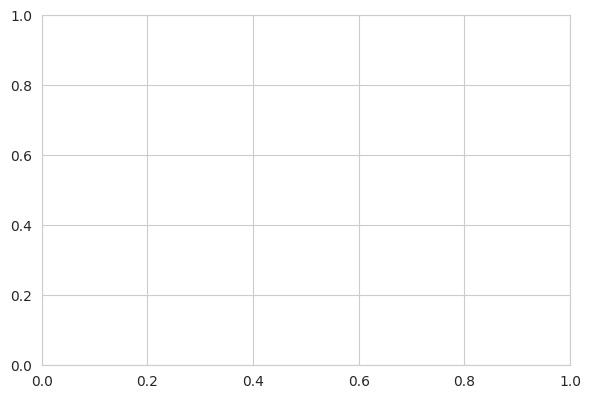

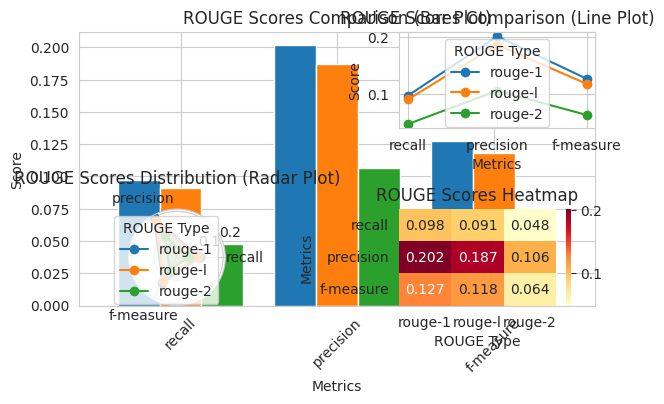

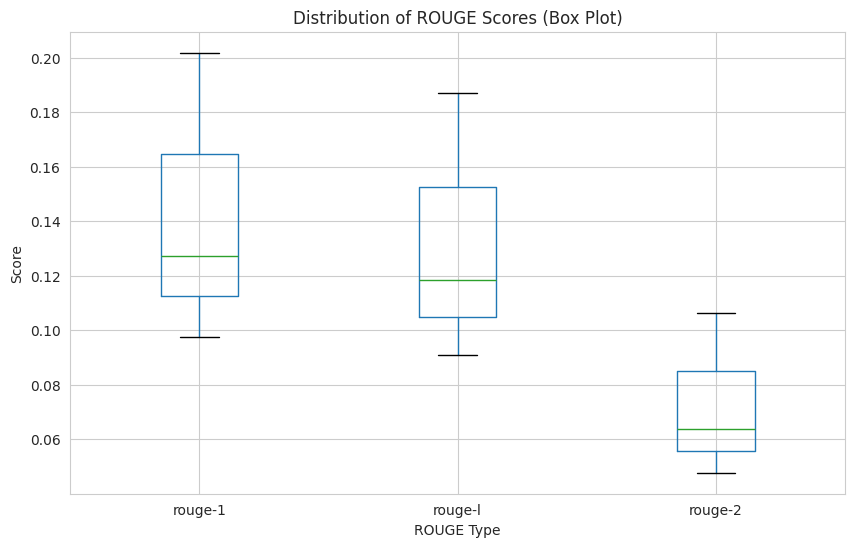

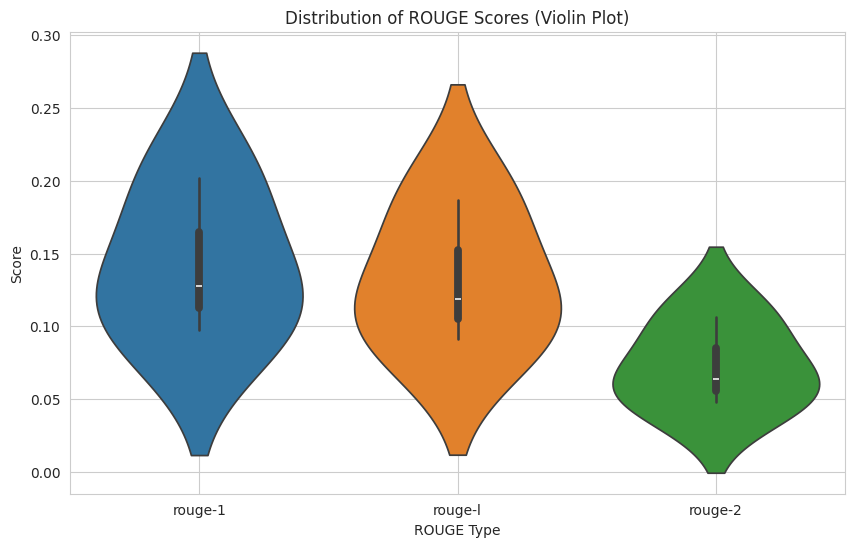

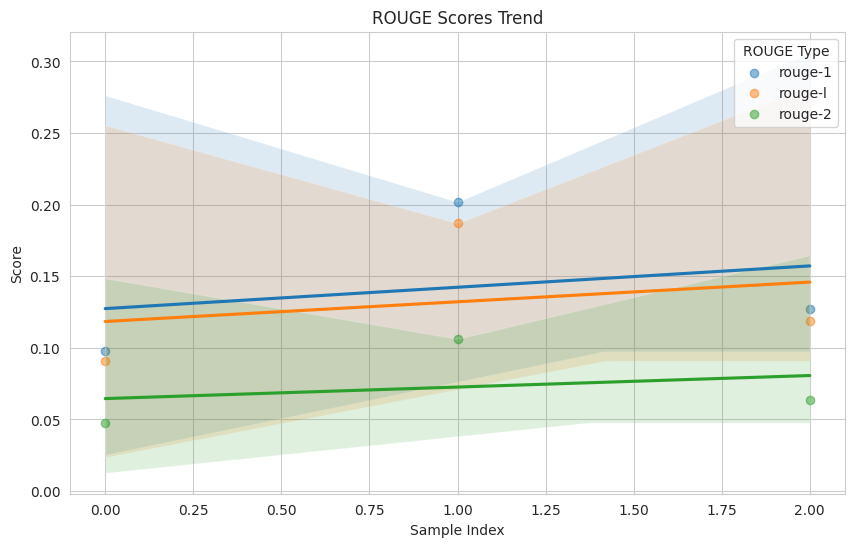

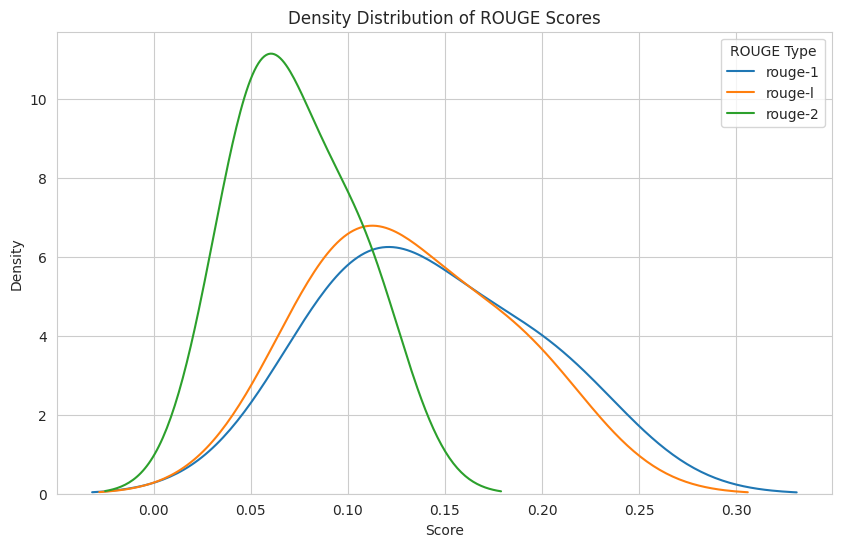

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Create the figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Bar Plot
plt.subplot(2, 2, 1)
T5Rouge.plot(kind='bar', width=0.8)
plt.title('ROUGE Scores Comparison (Bar Plot)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='ROUGE Type')

# 2. Line Plot with Markers
plt.subplot(2, 2, 2)
for column in T5Rouge.columns:
    plt.plot(T5Rouge.index, T5Rouge[column], marker='o', label=column)
plt.title('ROUGE Scores Comparison (Line Plot)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='ROUGE Type')
plt.grid(True)

# 3. Radar/Spider Plot
plt.subplot(2, 2, 3, projection='polar')
categories = T5Rouge.index
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

for column in T5Rouge.columns:
    values = T5Rouge[column].values.flatten()
    values = np.concatenate((values, [values[0]]))
    plt.plot(angles, values, marker='o', label=column)
    plt.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], categories)
plt.title('ROUGE Scores Distribution (Radar Plot)')
plt.legend(title='ROUGE Type')

# 4. Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(T5Rouge, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('ROUGE Scores Heatmap')
plt.xlabel('ROUGE Type')
plt.ylabel('Metrics')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Additional visualizations in separate figures

# Box Plot
plt.figure(figsize=(10, 6))
T5Rouge.boxplot()
plt.title('Distribution of ROUGE Scores (Box Plot)')
plt.xlabel('ROUGE Type')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=T5Rouge)
plt.title('Distribution of ROUGE Scores (Violin Plot)')
plt.xlabel('ROUGE Type')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Let's add a few more visualizations

# Scatter Plot with Trend Line
plt.figure(figsize=(10, 6))
for column in T5Rouge.columns:
    sns.regplot(x=np.arange(len(T5Rouge)), y=T5Rouge[column],
                label=column, scatter_kws={'alpha':0.5})
plt.title('ROUGE Scores Trend')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.legend(title='ROUGE Type')
plt.grid(True)
plt.show()

# KDE Plot (Density Distribution)
plt.figure(figsize=(10, 6))
for column in T5Rouge.columns:
    sns.kdeplot(data=T5Rouge[column], label=column)
plt.title('Density Distribution of ROUGE Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend(title='ROUGE Type')
plt.grid(True)
plt.show()

In [23]:
fig = px.bar(BartRouge*100, x=BartRouge.index, y=BartRouge.columns,
             barmode='group',
             text_auto='.2s',
             labels={
                     "Algo": "Algorithms",
                     "value": "Rouge Score",
                     "variable": "legend",
                     'index': "Metrics"
                 })
fig.update_layout( width=650,
                  height=400,
                title={
                  'text': "Score",
                  'y':.96,
                  'x':0.49,
                  'xanchor': 'center',
                  'yanchor': 'top'})

fig.show()

### **Sample Summaries**

In [ ]:
[i for i in Summaries['GoldSummary'][:5]]

["Chandrayaan-3: ‡¶Ü‡¶ú ‡¶ï‡¶ñ‡¶®, ‡¶ï‡ßã‡¶•‡¶æ ‡¶•‡ßá‡¶ï‡ßá ‡¶â‡ßé‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£, ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶ó‡¶∞‡ßç‡¶¨‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶Æ‡¶ø‡¶∂‡¶®‡ßá‡¶∞ ‡¶∏‡¶¨ ‡¶§‡¶•‡ßç‡¶Ø ‡¶è‡¶ï ‡¶ï‡ßç‡¶≤‡¶ø‡¶ï‡ßá chandrayaan 3 launch: Know when and whre to watch live updates of isro chandrayaan 3 countdown begins india's moon mission, this time scientists are more cautious",
 'Suvendu Adhikari: ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡ßü‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡ßá ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø‡ßá‡¶∞ ‡¶°‡ßá‡¶ô‡ßç‡¶ó‡¶ø ‡¶™‡¶∞‡¶ø‡¶∏‡ßç‡¶•‡¶ø‡¶§‡¶ø, ‡¶è‡¶ï‡¶æ‡¶ß‡¶ø‡¶ï ‡¶¨‡¶ø‡¶∑‡ßü‡ßá ‡¶Ü‡¶¨‡¶æ‡¶∞ ‡¶Æ‡ßÅ‡¶ñ ‡¶ñ‡ßÅ‡¶≤‡¶≤‡ßá‡¶® ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø‡ßá‡¶∞ ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶¶‡¶≤‡¶®‡ßá‡¶§‡¶æ ‡¶∂‡ßÅ‡¶≠‡ßá‡¶®‡ßç‡¶¶‡ßÅ ‡¶Ö‡¶ß‡¶ø‡¶ï‡¶æ‡¶∞‡ßÄ‡•§ ‡¶¶‡¶≤‡ßÄ‡ßü ‡¶™‡¶¶ ‡¶®‡¶ø‡ßü‡ßá‡¶ì ‡¶¶‡¶ø‡¶≤‡ßá‡¶® ‡¶¨‡¶ø‡¶∏‡ßç‡¶´‡ßã‡¶∞‡¶ï ‡¶â‡¶§‡ßç‡¶§‡¶∞ West Bengal Opposition Leader opens up on different issues like Nandigram and Panchayat Election and his aim in BJP Party',
 'Bus Accident: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶

In [ ]:
[i for i in Summaries['T5Summary'][:5]]

['‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶®‡ßá ‡¶Ü‡¶ú ‡¶è‡¶ï ‡¶¶‡¶æ‡¶∞‡ßÅ‡¶£ ‡¶ó‡¶∞‡ßç‡¶¨‡ßá‡¶∞ ‡¶¶‡¶ø‡¶®! ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞‡¶æ‡¶Ø‡¶º‡¶® ‡ß© -‡¶∞ ‡¶â‡ßé‡¶ï‡ßç‡¶∑‡ßá‡¶™‡¶£',
 '‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ‡¶∞ ‡¶®‡¶®‡ßç‡¶¶‡ßÄ‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡¶û‡ßç‡¶ö‡¶æ‡¶Ø‡¶º‡ßá‡¶§ ‡¶≠‡ßã‡¶ü ‡¶•‡ßá‡¶ï‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡ßá ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø‡ßá‡¶∞ ‡¶°‡ßá‡¶ô‡ßç‡¶ó‡¶ø ‡¶™‡¶∞‡¶ø‡¶∏‡ßç‡¶•‡¶ø‡¶§‡¶ø, ‡¶è‡¶ï‡¶æ‡¶ß‡¶ø‡¶ï ‡¶¨‡¶ø‡¶∑‡¶Ø‡¶º‡ßá ‡¶Ü‡¶¨‡¶æ‡¶∞ ‡¶Æ‡ßÅ‡¶ñ ‡¶ñ‡ßÅ‡¶≤‡¶≤‡ßá‡¶® ‡¶∞‡¶æ‡¶ú‡ßç‡¶Ø ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶¶‡¶≤‡¶®‡ßá‡¶§‡¶æ ‡¶∂‡ßÅ‡¶≠‡ßá‡¶®‡ßç‡¶¶‡ßÅ ‡¶Ö‡¶ß‡¶ø‡¶ï‡¶æ‡¶∞‡ßÄ‡•§',
 '‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡¶Ø‡¶º ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ‡¶∞‡ßç‡¶ò‡¶ü‡¶®‡¶æ‡•§ ‡¶∏‡¶≤‡ßç‡¶ü‡¶≤‡ßá‡¶ï ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂ ‡¶≠‡¶¨‡¶®‡ßá‡¶∞ ‡¶∏‡¶æ‡¶Æ‡¶®‡ßá ‡¶®‡¶ø‡¶Ø‡¶º‡¶®‡ßç‡¶§‡ßç‡¶∞‡¶£ ‡¶π‡¶æ‡¶∞‡¶æ‡¶≤ ‡¶¨‡¶æ‡¶∏‡•§',
 '‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶≤‡ßã‡¶ï‡¶∏‡¶≠‡¶æ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶ö‡¶®‡ßá ‡¶¨‡¶ø‡¶ú‡ßá‡¶™‡¶ø‡¶∞ ‡¶ú‡¶Ø‡¶º ‡¶®‡¶ø‡¶Ø‡¶º‡ßá ‡¶§‡ßÄ‡¶¨‡ßç‡¶∞ ‡¶ï‡¶ü‡¶æ‡¶

In [ ]:
[i for i in Summaries['BartSummary'][:5]]

['‡¶∂‡ßç‡¶∞‡ßÄ‡¶π‡¶∞‡¶ø‡¶ï‡ßç‡ßç‡¶¨‡¶æ: ‡¶∂‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶Æ‡¶π‡¶æ‡¶ï‡¶æ‡¶∂ ‡¶¨‡¶ø‡¶Ç‡ßç‡¶æ‡¶®‡ßá Áïô‡¶∂‡ßá‡¶∞ ‡ßç‡¶æ‡¶∞‡ßÅÁïô ‡¶ó‡¶∞‡ßç‡¶¨‡ßá‡¶∞ ‡¶¨‡¶ø‡¶®‡ß∑ Áïô‡¶Ç‡¶Ç ‡¶π‡¶¨‡ßá',
 '‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶®‡¶®‡ßç‡ßç‡ßç‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶™‡ßç‡ßç‡¶æ‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡ßç‡¶¨‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡ßá ‡¶∞‡¶æ‡¶Ç‡ßç‡¶Ø‡ßá‡¶∞ ‡¶¨‡ßá‡¶Ç‡ßç‡¶¨‡¶ø ‡¶™‡¶∞‡¶ø‡¶∏',
 '‡¶ï‡¶≤‡¶ï‡¶æ‡¶§‡¶æ: ‡¶∞‡¶¨‡¶ø‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá ‡¶∂‡¶π‡¶∞‡ßá‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ‡¶Ø‡¶º ‡¶¨‡¶æ‡¶∏ ‡¶¶‡ßÅ‡¶∞‡ßçÁïô‡¶∂‡¶®‡¶æ‡•§ ‡¶∏‡¶≤‡ßç‡¶Ç‡¶≤‡ßá‡¶ï ‡¶¨‡¶ø‡¶ï‡¶æ‡¶∂',
 '‡¶™‡ßç‡¶∞‡¶ø‡¶Ø‡¶º‡¶¨‡ßç‡¶∞‡¶§ ‡¶¨‡¶Ç‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ, ‡¶¨‡¶æ‡¶Ç‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ: ‡¶§ÈÅîÈÅî‡¶ÆÈÅî‡¶≤‡ßá ‡¶Ø‡¶æ‡¶Ç‡¶Ø‡¶º‡¶æ‡¶∞ ‡¶Ç‡¶≤‡ßç‡¶™‡¶®‡¶æ Áïô‡¶Ç‡¶º‡¶æ‡¶≤‡ßá‡¶® ‡¶¨‡¶ø‡¶Ç‡ßÅ‡¶™',
 '‡¶¨‡¶æ‡¶Ç‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ: ‡¶¨‡ßç‡ßç‡ßç‡ßç‡ßç‡¶ï‡ßá‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶Ç‡¶æ‡¶®‡ßá ‡¶¨‡¶æÈÅî‡¶ï‡ßÅ‡¶Ç‡¶º‡¶æ‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶Ç‡¶∞ ‡¶¨‡ßç‡¶≤‡¶ï‡ßá‡¶∞ ‡¶¨‡ßá‡¶≤‡¶æ‡¶™‡¶∞‡¶ø‡¶Ç‡ßá‡¶∞  ‡¶®']